In [3]:
#Author: Rex Wong
#Last Update: 2018-06-30
#An object-oriented perceptron API

# As a convention, we append an underscore(_) to attibutes that are 
# not being created upon the initialization of the object but by calling the 
# object's other methods, for example, self.w_

import numpy as np

In [4]:
class Perceptron(object):
    
#     Perceptron classifier
#     Parameters
#     ---------------------------------------
#     eta: float
#         Learning Rate (between 0.0 and 1.0)
#     n_iter: int
#         Passes over the training dataset.
#     random_state: int
#         Random number generator seed for random weight initialization
#     """
#     Attributes
#     ------------------------------
#     w_: 1d-array
#         Weights after fitting
#     errors: list
#         No. of misclassification (updates) in each epoch
#     """
    
    def __init__(self,eta = 0.01, n_iter = 50, random_state =1):
        self.eta =eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,x,y):
        """Fit Training data.
        
        Parameters
        ------------------------
        X: {array-like}. shape = [n_samples, n_features],
            Traing vectors, where n_samples is the number of samples 
            and n_features is the number of features
        
        y: array-like, shape = [n_sample]
            Target values
            
        Returns
        -----------------
        --------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1]) 
        #Dimention: 1 + features, 1 is the bias unit
        #Weights cannot be all zero because the learning rate eta onl has an effect on the classification outcome if the weights are initilized to non-zero value
        
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #zip : zip((1,2,3),(4,5,6)) = [(1,4),(2,5),(3,6)]
                #zip : zip((1,2,3),(4)) = [(1,4),(2,4),(3,4)]
                update = self.eta*(target - self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+= update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:])+self.w_[0]
        #vector dot product
    def predict(self,X):
        """Return Class label after unit step"""
        return np.where(self.net_input(X)>=0.0,1,-1)
            
    
    

In [5]:
#Training a perceptron model on the Iris dataset

import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#Plotting the Iris data

import matplotlib.pyplot as plt

In [7]:
#Select setosa and versicolor
#Note that the first 100 calss labels that correspond to the 50 Iris-setosa and 50 Iris-versicolor

y = df.iloc[0:100,4].values
#Convert them the class labels into the two integer class labels, 1(versicolor) and -1 (setosa)
y = np.where(y=='Iris-setosa',-1,1)

#extract sepal length and petal length

X = df.iloc[0:100,[0,2]].values

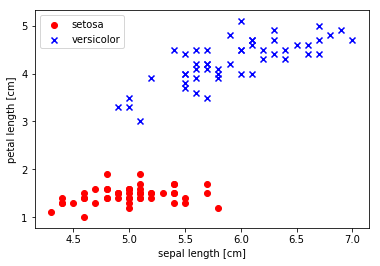

In [8]:
#Plot data

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color='blue',marker='x',label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png',dpi=300)
plt.show()

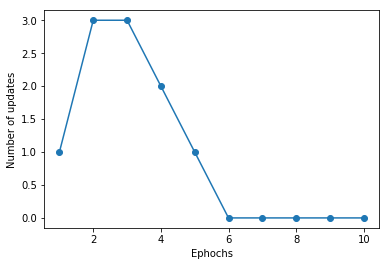

In [9]:
#Training the perceptron model

ppn = Perceptron(eta=0.1,n_iter=10)

ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Ephochs')
plt.ylabel('Number of updates')

#plt.savefig('images/02_07.png',dpi=300)
plt.show()

#As we can see, out perceptron converged after the sixth epoch and should now be able to classify the training samples perfectly

In [10]:
#A function for plotting decision regions
#Visualize the decision boundaries for 2D datasets
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    #meshgrid: x = [(x1, x2, x3),(x1, x2, x3),(x1, x2, x3)]
    #meshgrid: y = [(x1, x1, x1),(x2, x2, x2),(x3, x3, x3)]
    #meshgrid allows each x matches each y value
    
    #np.arange allows the the step to be a decimal
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #ravel flatten the grid array
    #and create a matrix that has the same number of columns as the Iris training subset
    Z = Z.reshape(xx1.shape)
    #.shape output the shape of xx1
    #Z.reshape reshapes the Z to the shape of xx1
    
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot class samples

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha = 0.8,
                    c= colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
                    

            

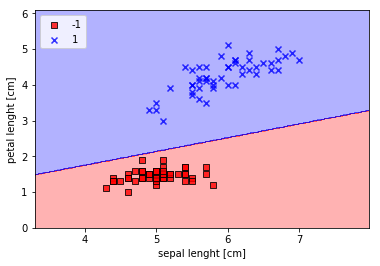

In [11]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_08.png',dpi=300)
plt.show()

In [12]:
#Adaptive linear nerous and the convergence of learning 
#Implementing an adaptive linear neuron in Python

In [13]:
class AdalineGD(object):
    """ADAtive LInear NEuron classifier
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
        
    Attributes
    -----------
    w_: 1d-array
        Weights after fitting
    cost_: list
        Sum of squares cost function value in each epoch 
    
    """
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        """Fit training data.
        
        Parameters
        ---------------------------
        X:{array-like}, shape=[n_samples,n_features]
            Training vectors, where n_samples is the number of samples 
            and n_features is the number of features
        y: array-like, shape = [n_samples]
            Target values
            
        Returns
        --------------------------
        self:object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            """
            Please note that the "activation" method has no effect
            in the code since it is simply an identity function.
            we could write 'output = self.net_input(X)' instead
            The purpose of the activation is more conceptual, i.e.,
            in the case of logistic regression (as we will see later),
            we could change it to a sigmoid function to implement a 
            logistic regression classifier
            """
            output=self.activation(net_input)
            """
            We calculate the gradient based on the whole training dataset
            via self.eta*errors.sum() for the bais unit (zero-weight) and
            via self.eta*X.T.dot(errors)
            """
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
            
            
        return self
    
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        """Compute linear activation"""
        return X
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)
    


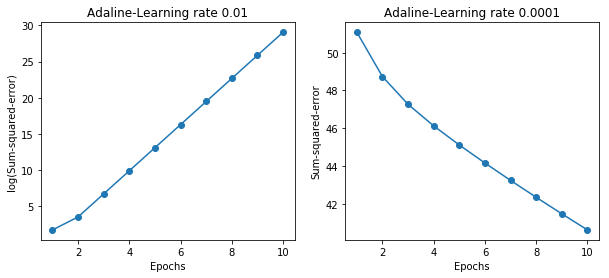

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

#learning rate too large, overshoot the global minimum
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')

#learning rate too small, less efficient
ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline-Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [15]:
#Improving gradient descent through feature scaling
#standardize features
X_std = np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()


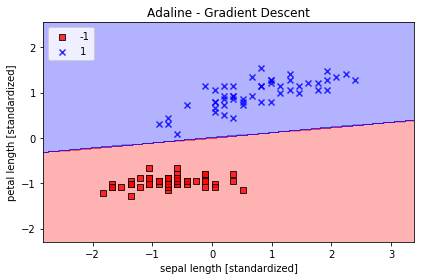

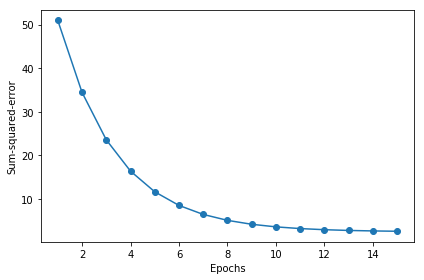

In [16]:
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)

plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/02_14_1.png',dpi=300)
plt.show()

plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png',dpi=300)
plt.show()

In [27]:
#Large scale machine learning and stochastic gradient descent

class AdalineSGD(object):
    """ADAPtive LInear NEuron classifier
    
    Parameters
    ------------------------------
    eta: float
        Learning rate (between 0.0 and 0.1)
    n_iter: int
        Passes over the training dataset
    shuffle: bool (default: True)
        Shuffles training data every epoch if True to prevent cycles
    random_state: int
        Random number generator seed for random weight
    
    Attributes
    ------------------------------
    w_ : 1d-array
        Weights after fitting
    cost_: list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch
    
    """
    
    def __init__(self,eta = 0.01, n_iter=10, shuffle = True, random_state=None):
        self.eta = eta
        self.n_iter=n_iter
        self.w_initialized = True
        self.shuffle = shuffle
        self.random_state=random_state
    def fit(self,X,y):
        """Fit training data.
        
        Parameters
        --------------------
        X:{array-like}, shape = {n_samples,n_features}
            Trainung vectors, where n_samples is the number of samples and n_features is the number of features
        y: array-like, shape = {n_samples}
            Target values
        
        Returns
        ----------------------
        self : object     
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        
        return self
    
    def partial_fit(self,X,y):
        """Fit traininig data without reinitializing the weight"""
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi,target in zip(X,y):
                self_update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        """Shuffle training data"""
        #via permutation function in np.random, we generate a random sequence
        #of unique numbers in the range 0 to 100
        #Those numbers can then be used as indices to shuffle our feature matrix and class lasbel vector
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self,m):
        """Initialize weights to small random numbers"""
        self.rgen=np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale=0.01,size=1+m)
        self.w_initialized=True
    
    def _update_weights(self,xi,target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error=(target-output)
        self.w_[1:]+=self.eta*xi.dot(error)
        self.w_[0]+=self.eta*error
        cost = 0.5*error**2
        return cost
    
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        """Compute linear activation"""
        return X
    
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)
    

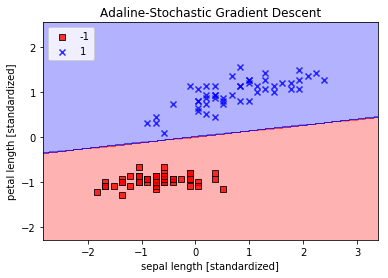

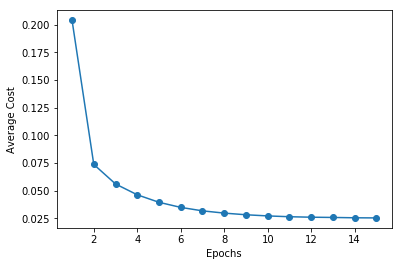

In [30]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)

ada.fit(X_std,y)

plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline-Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()